In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv("spam_ham_dataset[1].csv")

In [4]:
print(data.head())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [5]:
assert 'text' in data.columns and 'label' in data.columns, "Dataset must contain 'text' and 'label' columns"

In [6]:
X = data['text']
y = data['label']

In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)

In [13]:
acc = accuracy_score(y_test, y_pred)

In [14]:
print("\nModel Accuracy:", round(acc*100, 2), "%")


Model Accuracy: 98.65 %


In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       735
        spam       0.97      0.99      0.98       300

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035



In [16]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

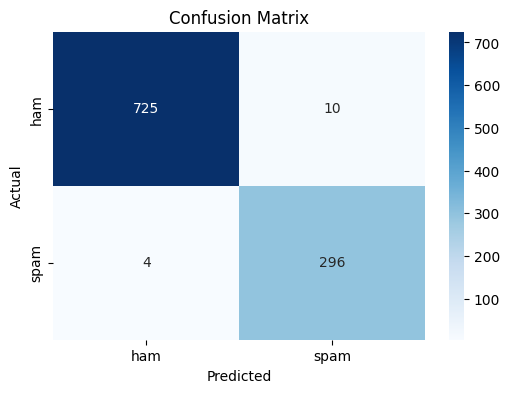

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

/tmp/ipython-input-1321123654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_acc, test_acc], palette='viridis')


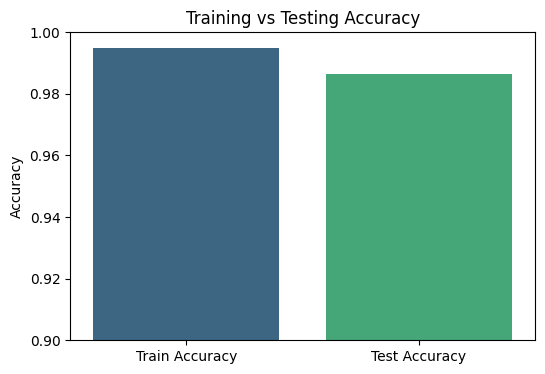

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_acc, test_acc], palette='viridis')
plt.title("Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1)
plt.show()

In [20]:
feature_names = vectorizer.get_feature_names_out()

In [21]:
coefs = model.coef_[0]
coef_df = pd.DataFrame({'word': feature_names, 'coef': coefs})

In [22]:
top_spam = coef_df.sort_values(by='coef', ascending=False).head(20)

In [23]:
top_ham = coef_df.sort_values(by='coef').head(20)

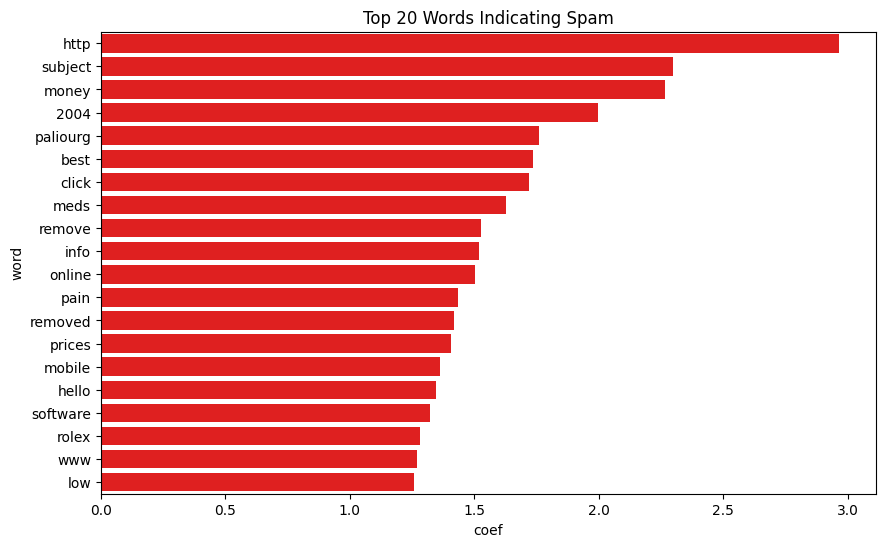

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='coef', y='word', data=top_spam, color='red')
plt.title("Top 20 Words Indicating Spam")
plt.show()

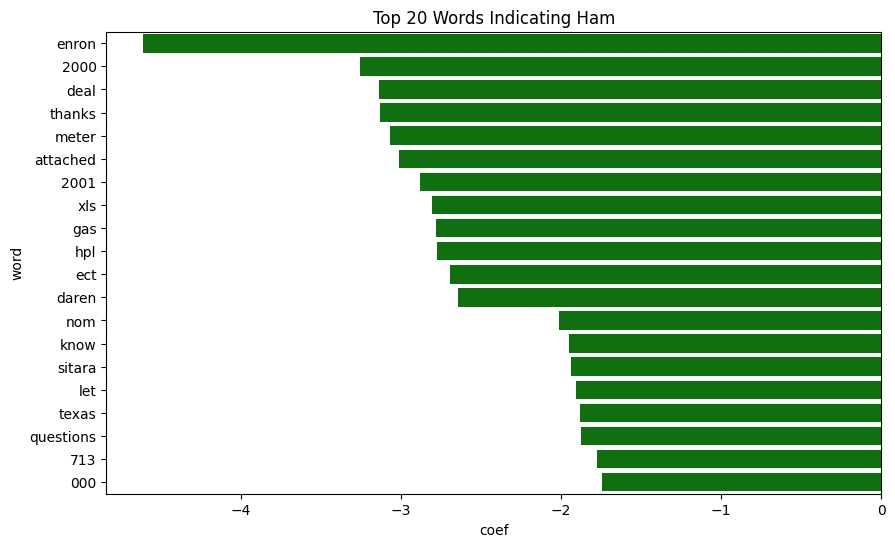

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='coef', y='word', data=top_ham, color='green')
plt.title("Top 20 Words Indicating Ham")
plt.show()